# pre processing on dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns 
import re
import nltk
from collections import Counter

# load dataset tweets.csv

In [2]:
# Read the CSV file
data = pd.read_csv('tweets.csv')
print (data.shape)
# Display the first few rows of the dataframe
data.head()

(6444, 28)


,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [3]:
data['text_copy'] = data['text'].copy()


In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Ensure stopwords and tokenizer are available
nltk.download("stopwords")
nltk.download("punkt")

# Define custom stopwords
custom_stopwords = set(stopwords.words("english"))
custom_stopwords.update([
    "will", "people", "great", "and", "a", "to", "of", "that", "n't", "is",'said','time', 'say','years','ca','amazing','best','good','help','sure','world','pay',
    "in", "s", "que", "de", "la", "at", "be", "the", "he", "she", "you", "amp",'tomorrow','sad','day','need','know','night','got','want','says','\'ve',
    "make", "one", "new", '\'s', '\'d', '\'re',' ca ', 'like','really', 'look','sad','ve','wow','thank','let','going','big','today','tonight','enjoy',
    'love','plan','believe','life','demsinphilly','fight','millions','million','win','working','proud','support','stand','way','history','things','man','wants'
])

# Function to replace commonly abbreviated or colloquial terms
def replace_chat_words(text):
    chat_words = {
        "OMG": "oh my god", "LOL": "laugh out loud", "OOTD": "outfit of the day",
        "NGL": "not gonna lie", "LMAO": "laugh my ass off"
    }
    for word, expanded_form in chat_words.items():
        text = re.sub(r"\b{}\b".format(word), expanded_form, text, flags=re.IGNORECASE)
    return text

# Function to group semantically similar words
def replace_synonyms(text):
    synonyms_map = {
        "job": ["work", "career",'worker','workers','jobs'],
        'makeamericagreatagain': ['makeamericagreat','americafirst'],
        'family': ['families', 'family'],
        'best': ['better'],
        'right': ['rights'],
        'ted': ['cruz'],
        'american': ['americans','america','american','country','united'],
        "vote": ["poll", "election",'debate','candidate'],
        "economy": ["finance", "market",'tax','business'],
        "health": ["healthcare", "wellness",'health','care','hospital','hospitals','nurse','insurance'],
        "nationalsecurity": ["migrant", "border",'immigrant','immigrants','wall','terrorism','terrorist','terrorists','security','immigration'],
        "trump":['trump2016'],
        'president':['rncincle'],
        'women':['woman']
        
        # Add more semantic groups here
    }
    # Specific rule to unify names
    text = re.sub(r"\bhillary clinton\b", "clinton", text, flags=re.IGNORECASE)
    text = re.sub(r"\bhillary\b", "clinton", text, flags=re.IGNORECASE)
    text = re.sub(r"\bclinton\b", "clinton", text, flags=re.IGNORECASE)
    
    text = re.sub(r"\bdonald trump\b", "trump", text, flags=re.IGNORECASE)
    text = re.sub(r"\bdonald\b", "trump", text, flags=re.IGNORECASE)
    text = re.sub(r"\btrump\b", "trump", text, flags=re.IGNORECASE)
    
    for target, synonyms in synonyms_map.items():
        pattern = r'\b(?:' + '|'.join(synonyms) + r')\b'
        text = re.sub(pattern, target, text, flags=re.IGNORECASE)
    return text

# Function to clean and preprocess text
def clean_text(text):
    text = replace_chat_words(text)
    text = replace_synonyms(text)
    text = re.sub(r"\b\d{1,3},?000\b", "", text)  # Remove numbers like "1,000", "200000", etc.
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#", "", text)  # Remove hashtags, but keep the word
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in custom_stopwords]
    return " ".join(tokens)

# Load and preprocess the dataset
data['text_copy'] = data['text_copy'].fillna('')
data['text_copy'] = data['text_copy'].apply(clean_text)

# Optional: View preprocessed text data
data['text_copy'].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                   question vote : put plans action ?
1    last , trump paying taxes `` smart . '' call ?...
2    could . vision command last vote showed ready ...
3                    together , nothing . ready vote :
4    candidates asked confront racial injustice . r...
Name: text_copy, dtype: object

In [5]:
print(data['text_copy'].shape)

(6444,)


In [6]:
themes_trump = {
    "American Patriotism": ['american','makeamericagreatagain'],
    'Election and Campaign': ['trump', 'american', 'makeamericagreatagain', 'president', 'iowa', 'york','campaign', 'republican','candidates'],
    'Nation Security, Immigration, and Violence': ['nationalsecurity'],
    'Trump\'s Criticism to Media and Opponents': ['crooked', 'media', 'obama', 'bad', 'bernie', 'clinton', 'hillary'
    ,'rubio', 'ted'],
    "Family Wellness": ['family'],
    "Healthcare": ['health'],
    'Appealling people to Support': ['vote', 'join', 'speech'],
    'Economy and Jobs': ['job']
}

themes_clinton = {
    "American Patriotism": ['american','makeamericagreatagain'],
    'Election and Campaign': ['trump', 'clinton', 'president', 'vote', 'campaign', 'american','candidates'],
    'Economy and Jobs': ['economy', 'job'],
    "Healthcare": ['health'],
    'Social Issues (Women’s Rights, Kids, LGBT)': ['family', 'women', 'right', 'woman', 'kids', 'lgbt'],
    'Nation Security, Immigration, and Violence': ['nationalsecurity', 'gun', 'violence','security'],
    'Clinton\'s Criticism to media and Opponents': ['trump'],
    "Family Wellness": ['family'],
    'Appealling people to Support': ['watch', 'live','speech', 'join','vote']
}


In [7]:
data['time'] = pd.to_datetime(data['time'])
# Define a function to assign a theme based on the keywords in text
def assign_theme(text, themes):
    matched_themes = [theme for theme, keywords in themes.items() if any(keyword in text for keyword in keywords)]
    return matched_themes if matched_themes else ["Other"]

# Assign themes to each tweet
data['themes'] = data.apply(
    lambda row: assign_theme(row['text_copy'], themes_trump) if row['handle'] == 'realDonaldTrump' 
                else assign_theme(row['text_copy'], themes_clinton), axis=1)


In [8]:
expanded_themes = data['themes'].explode()

unique_themes = expanded_themes.unique()
print("Unique themes:", unique_themes)

theme_counts = expanded_themes.value_counts()
print("Theme counts:")
print(theme_counts)


Unique themes: ['Election and Campaign' 'Appealling people to Support'
 "Clinton's Criticism to media and Opponents" 'American Patriotism'
 'Economy and Jobs' "Trump's Criticism to Media and Opponents" 'Other'
 'Social Issues (Women’s Rights, Kids, LGBT)' 'Family Wellness'
 'Healthcare' 'Nation Security, Immigration, and Violence']
Theme counts:
themes
Election and Campaign                         3730
Other                                         1336
American Patriotism                           1208
Appealling people to Support                  1152
Trump's Criticism to Media and Opponents      1007
Clinton's Criticism to media and Opponents     923
Social Issues (Women’s Rights, Kids, LGBT)     523
Economy and Jobs                               511
Nation Security, Immigration, and Violence     340
Family Wellness                                214
Healthcare                                     114
Name: count, dtype: int64


In [9]:
#accroding to the table, id (stands for user id) is not useful for the analysis, so we can drop it
#source_url is also not useful for the analysis, so we can drop it
#entities is also not useful for the analysis, so we can drop it
data = data.drop(['id','source_url','entities'], axis=1)

# Data cleaning

The purpose of this section is to identidy useless attributes and enhance the efficiency on data visualisation.

Note: you may need to restart the kernel to use updated packages.


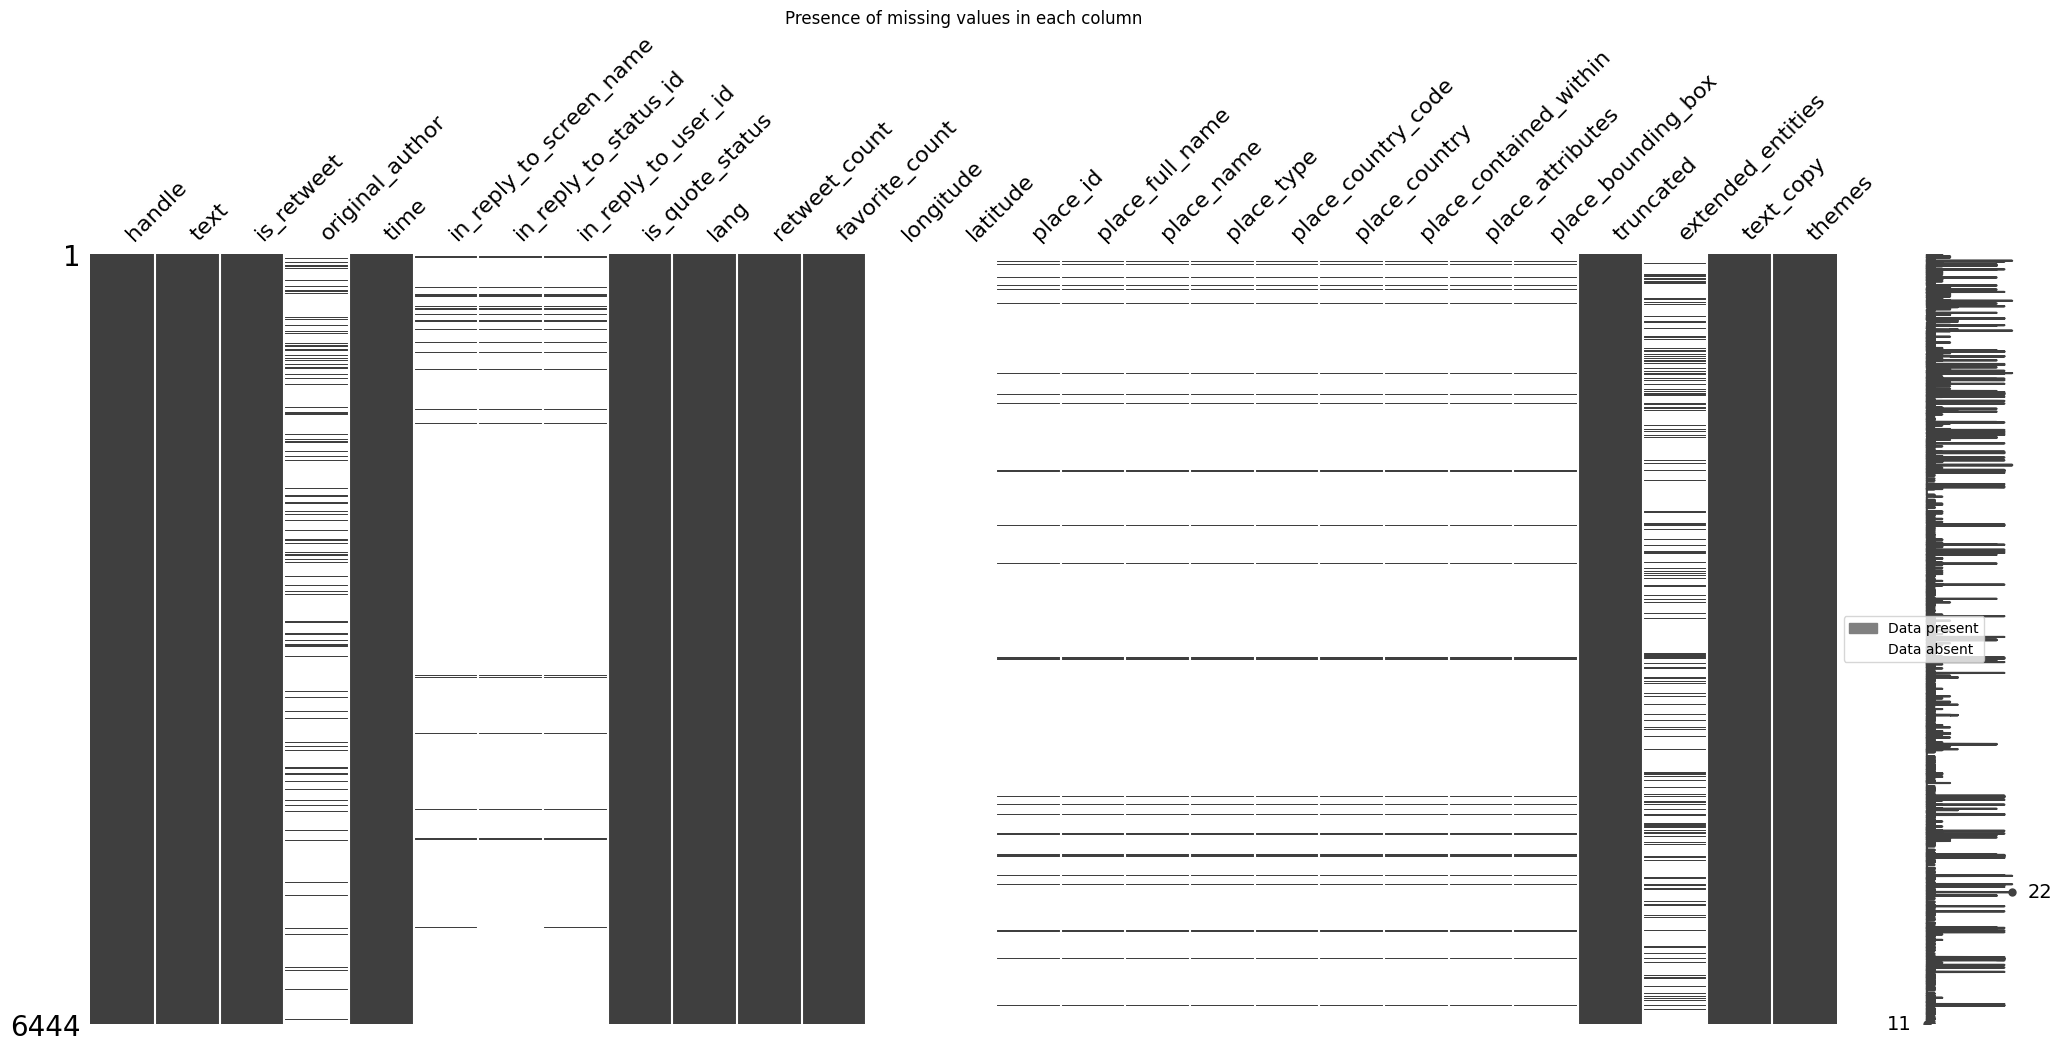

In [10]:
# visualize missing values using Missingno Library
# source:https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
# Legend the matrix. source: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html
%pip install missingno

import missingno as msno
import matplotlib.patches as mpatches

msno.matrix(data)
gray_patch = mpatches.Patch(color='grey', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch],loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Presence of missing values in each column')
plt.savefig('MissingValuesPresence')

In [11]:
#drop columns with high proportion missing values
data = data.drop(['original_author','in_reply_to_screen_name',
                    'in_reply_to_status_id','in_reply_to_user_id',
                    'longitude','latitude','place_id','place_full_name',
                    'place_name','place_type','place_country_code',
                    'place_country','place_contained_within','place_attributes',
                    'place_bounding_box','extended_entities'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   handle           6444 non-null   object        
 1   text             6444 non-null   object        
 2   is_retweet       6444 non-null   bool          
 3   time             6444 non-null   datetime64[ns]
 4   is_quote_status  6444 non-null   bool          
 5   lang             6444 non-null   object        
 6   retweet_count    6444 non-null   int64         
 7   favorite_count   6444 non-null   int64         
 8   truncated        6444 non-null   bool          
 9   text_copy        6444 non-null   object        
 10  themes           6444 non-null   object        
dtypes: bool(3), datetime64[ns](1), int64(2), object(5)
memory usage: 421.8+ KB


In [13]:
# detect data type for each column so we can compare with contents displaied above.
# detect categories
cat = data.loc[:,data.dtypes == 'object']
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   handle     6444 non-null   object
 1   text       6444 non-null   object
 2   lang       6444 non-null   object
 3   text_copy  6444 non-null   object
 4   themes     6444 non-null   object
dtypes: object(5)
memory usage: 251.8+ KB


In [14]:
data['time'] = pd.to_datetime(data['time'])
data['date'] = data['time'].dt.date

In [15]:
# detect numericals
num = data.loc[:,data.dtypes != 'object']
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   is_retweet       6444 non-null   bool          
 1   time             6444 non-null   datetime64[ns]
 2   is_quote_status  6444 non-null   bool          
 3   retweet_count    6444 non-null   int64         
 4   favorite_count   6444 non-null   int64         
 5   truncated        6444 non-null   bool          
dtypes: bool(3), datetime64[ns](1), int64(2)
memory usage: 170.0 KB


In [16]:
#detect of missing values in each column.
data.isna().sum()

handle             0
text               0
is_retweet         0
time               0
is_quote_status    0
lang               0
retweet_count      0
favorite_count     0
truncated          0
text_copy          0
themes             0
date               0
dtype: int64

In [17]:
data.head()

,handle,text,is_retweet,time,is_quote_status,lang,retweet_count,favorite_count,truncated,text_copy,themes,date
0,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28 00:22:34,False,en,218,651,False,question vote : put plans action ?,"[Election and Campaign, Appealling people to S...",2016-09-28
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27 23:45:00,False,en,2445,5308,False,"last , trump paying taxes `` smart . '' call ?...","[Election and Campaign, Clinton's Criticism to...",2016-09-27
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27 23:26:40,False,en,7834,27234,False,could . vision command last vote showed ready ...,"[Election and Campaign, Appealling people to S...",2016-09-27
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,2016-09-27 23:08:41,False,en,916,2542,False,"together , nothing . ready vote :","[Election and Campaign, Appealling people to S...",2016-09-27
4,HillaryClinton,Both candidates were asked about how they'd co...,False,2016-09-27 22:30:27,False,en,859,2882,False,candidates asked confront racial injustice . r...,[Election and Campaign],2016-09-27


In [18]:
# only consider english tweets
data = data[data['lang'] == 'en']
data['lang'].value_counts()

lang
en    6248
Name: count, dtype: int64

In [19]:
data['handle'].value_counts(dropna=False)

handle
realDonaldTrump    3131
HillaryClinton     3117
Name: count, dtype: int64

## further cleaning for the text content

To better analyze the semantics of the text, basic text cleaning is necessary. This includes removing unstructured content such as hyperlinks, emojis, and meaningless punctuation, among other elements.

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
# convert some emojis to text so keep the meaning of the text
emoji_dict = {
    u"\U0001F600": "happy",  # grinning_face
    u"\U0001F601": "happy",  # beaming_face_with_smiling_eyes
    u"\U0001F602": "laughing",  # face_with_tears_of_joy
    u"\U0001F603": "happy",  # smiling_face_with_open_mouth
    u"\U0001F604": "happy",  # smiling_face_with_open_mouth_and_smiling_eyes
    u"\U0001F606": "laughing",  # smiling_face_with_open_mouth_and_closed_eyes
    u"\U0001F609": "wink",  # winking_face
    u"\U0001F60A": "happy",  # smiling_face_with_smiling_eyes
    u"\U0001F60D": "love",  # smiling_face_with_heart_eyes
    u"\U0001F618": "kiss",  # face_blowing_a_kiss
    u"\U0001F621": "angry",  # pouting_face
    u"\U0001F622": "sad",  # crying_face
    u"\U0001F62D": "crying",  # loudly_crying_face
    u"\U0001F624": "frustrated",  # face_with_steam_from_nose
    u"\U0001F631": "scared",  # face_screaming_in_fear
    u"\U0001F62A": "tired",  # sleepy_face
    u"\U0001F44D": "thumbs_up",  # thumbs_up
    u"\U0001F44E": "thumbs_down",  # thumbs_down
    u"\U0001F923": "laughing",  # rolling_on_the_floor_laughing
    u"\U0001F620": "angry",  # angry_face
    u"\U0001F637": "sick",  # face_with_medical_mask
    u"\U0001F634": "sleeping",  # sleeping_face
    u"\U0001F644": "eyeroll",  # face_with_rolling_eyes
    u"\U0001F60B": "yummy",  # face_savoring_food
    u"\U0001F60C": "relieved",  # relieved_face
    u"\U0001F60F": "smirk",  # smirking_face
    u"\U0001F60E": "cool",  # sunglasses
    u"\U0001F62F": "surprised"  # hushed_face
}

def replace_emoji(text):
    for emoji, description in emoji_dict.items():
        text = text.replace(emoji, f" {description} ")
    return ' '.join(text.split())
    
def replace_synonyms(text):
    synonyms_map = {
        "job": ["work", "career",'worker','workers','jobs'],
        'makeamericagreatagain': ['makeamericagreat','americafirst'],
        'family': ['families', 'family'],
        'right': ['rights'],
        'ted': ['cruz'],
        'american': ['americans','america','american','country','united'],
        "vote": ["poll", "election",'debate','candidate'],
        "economy": ["finance", "market",'tax','business'],
        "health": ["healthcare", "wellness",'health','care','hospital','hospitals','nurse','insurance'],
        "nationalsecurity": ["migrant", "border",'immigrant','immigrants','wall','terrorism','terrorist','terrorists','security','immigration'],
        "trump":['trump2016'],
        'president':['rncincle'],
        'women':['woman']
        
    }
    # Specific rule to unify names
    text = re.sub(r"\bhillary clinton\b", "clinton", text, flags=re.IGNORECASE)
    text = re.sub(r"\bhillary\b", "clinton", text, flags=re.IGNORECASE)
    text = re.sub(r"\bclinton\b", "clinton", text, flags=re.IGNORECASE)
    
    text = re.sub(r"\bdonald trump\b", "trump", text, flags=re.IGNORECASE)
    text = re.sub(r"\bdonald\b", "trump", text, flags=re.IGNORECASE)
    text = re.sub(r"\btrump\b", "trump", text, flags=re.IGNORECASE)
    text = re.sub(r"\brealdonaldtrump\b", "trump",text,flags=re.IGNORECASE)
    
    for target, synonyms in synonyms_map.items():
        pattern = r'\b(?:' + '|'.join(synonyms) + r')\b'
        text = re.sub(pattern, target, text, flags=re.IGNORECASE)
    return text
# clean text
def clean_text(text):
    # convert emojis to text
    text = replace_emoji(text)

    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # remove ‘@’ mentions
    text = re.sub(r"@(\w+)", r"\1", text)

    # remove hashtags 
    text = re.sub(r"#\S+", "", text)
    
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # keep only alphabets
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)

    # remove single characters that are meaningless, keep 'a', 'u' and 'I' as they are meaningful
    text = re.sub(r'\b[b-hj-tv-zB-HJ-TV-Z]\b', '', text)

    # remove numbers
    text = re.sub(r'[0-9]+', '', text)

    # split text into words and make them lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return " ".join(tokens)

# apply the functions to the text column
data['cleaned_text'] = data['text'].apply(clean_text)
data['cleaned_text'] = data['cleaned_text'].apply(replace_synonyms)

# remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.difference_update({'not', 'very', 'no', 'never'})
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,The question in this election: Who can put the...,question vote put plan action make life better
1,"Last night, Donald Trump said not paying taxes...",last night trump said not paying economy wa sm...
2,Couldn't be more proud of @HillaryClinton. Her...,proud hillaryclinton vision command last night...
3,"If we stand together, there's nothing we can't...",stand together nothing make sure ready vote
4,Both candidates were asked about how they'd co...,vote asked confront racial injustice one real ...


In [22]:
# count words frequency in the cleaned text
word_freq = Counter(" ".join(data['cleaned_text']).split()).items()
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
word_freq[:10]


[('trump', 1775),
 ('clinton', 1192),
 ('american', 1028),
 ('vote', 710),
 ('not', 585),
 ('thank', 569),
 ('great', 534),
 ('people', 425),
 ('ha', 403),
 ('president', 400)]

According to the theme analysis, the sentiment analysis will focus on the following topics:


# sentiment analysis

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#dwownload vader_lexicon
nltk.download('vader_lexicon')
#initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# calculate sentiment scores
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

data[['cleaned_text', 'sentiment']].head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_text,sentiment
0,question vote put plan action make life better,0.4404
1,last night trump said not paying economy wa sm...,0.4019
2,proud hillaryclinton vision command last night...,0.7650
3,stand together nothing make sure ready vote,-0.4717
4,vote asked confront racial injustice one real ...,-0.6597


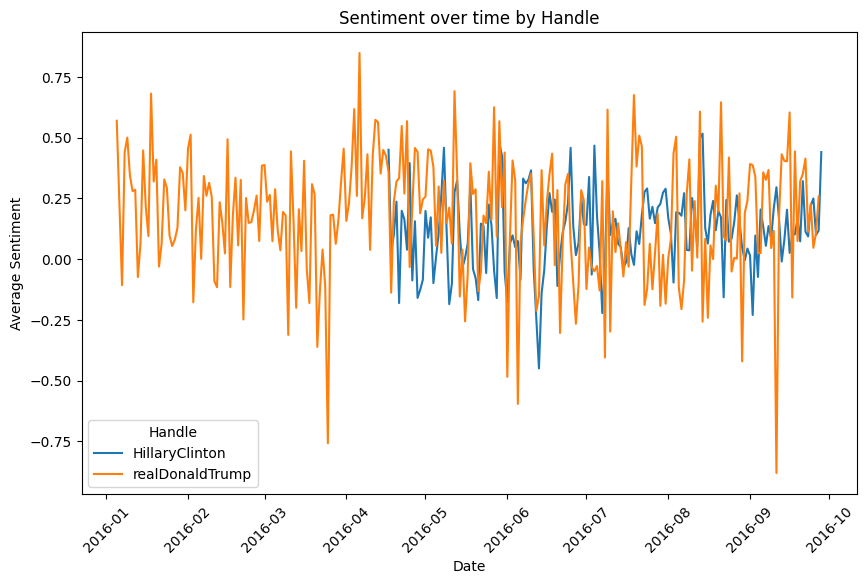

In [24]:
#time series analysis
#group by date and handle
date_sentiment = data.groupby(['date', 'handle']).agg({'sentiment': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

for handle, group_data in date_sentiment.groupby('handle'):
    plt.plot(group_data['date'], group_data['sentiment'], label=handle)

plt.title('Sentiment over time by Handle')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend(title='Handle')  
plt.xticks(rotation=45)  


plt.savefig('SentimentOverTimeByHandle.png')
plt.show()

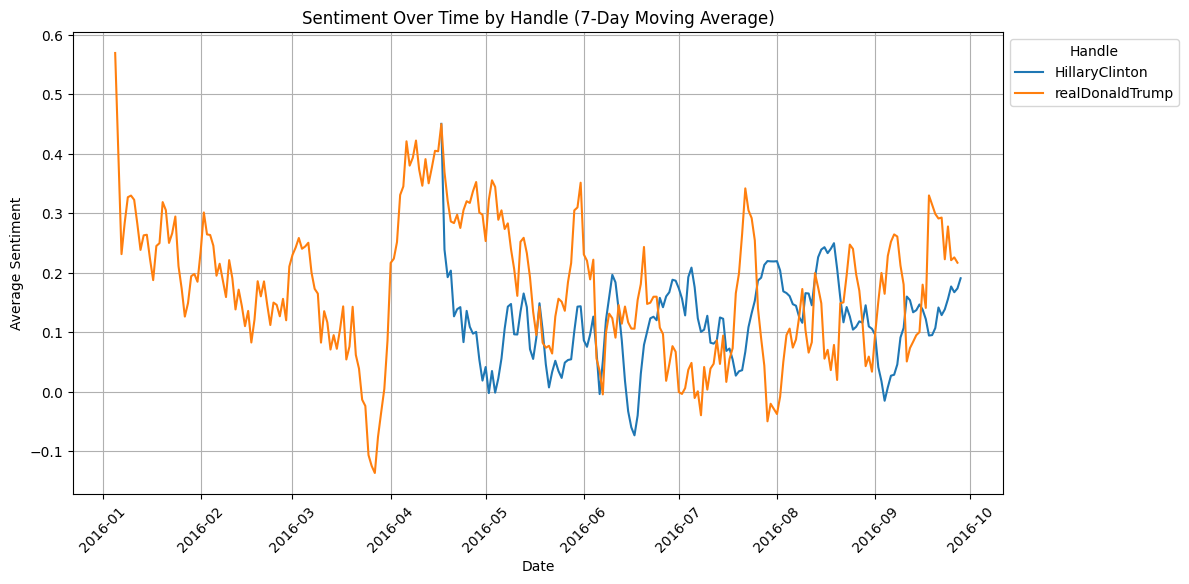

In [25]:
date_sentiment['sentiment_smooth'] = date_sentiment.groupby('handle')['sentiment'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())


plt.figure(figsize=(12, 6))


for handle, group_data in date_sentiment.groupby('handle'):
    plt.plot(group_data['date'], group_data['sentiment_smooth'], label=handle)

plt.title('Sentiment Over Time by Handle (7-Day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend(title='Handle', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.grid(True)  
plt.xticks(rotation=45)  


plt.savefig('SentimentOverTimeByHandle_Smoothed.png', bbox_inches='tight')
plt.show()

In [26]:
import plotly.express as px


fig = px.line(date_sentiment, x='date', y='sentiment', color='handle',
              title='Sentiment Over Time by Handle',
              labels={'date': 'Date', 'sentiment': 'Average Sentiment'})
fig.update_layout(xaxis_rangeslider_visible=True)  
fig.show()


In [27]:
data.isna().sum()

handle             0
text               0
is_retweet         0
time               0
is_quote_status    0
lang               0
retweet_count      0
favorite_count     0
truncated          0
text_copy          0
themes             0
date               0
cleaned_text       0
sentiment          0
dtype: int64

In [28]:
data['themes'].value_counts()
data[['text','cleaned_text', 'themes']].head()

,text,cleaned_text,themes
0,The question in this election: Who can put the...,question vote put plan action make life better,"[Election and Campaign, Appealling people to S..."
1,"Last night, Donald Trump said not paying taxes...",last night trump said not paying economy wa sm...,"[Election and Campaign, Clinton's Criticism to..."
2,Couldn't be more proud of @HillaryClinton. Her...,proud hillaryclinton vision command last night...,"[Election and Campaign, Appealling people to S..."
3,"If we stand together, there's nothing we can't...",stand together nothing make sure ready vote,"[Election and Campaign, Appealling people to S..."
4,Both candidates were asked about how they'd co...,vote asked confront racial injustice one real ...,[Election and Campaign]


In [29]:
# 将每个主题拆分成单独的行
expanded_themes = data['themes'].explode()

# 查看所有唯一值
unique_themes = expanded_themes.unique()
print("Unique themes:", unique_themes)

# 计算每个主题的频率
theme_counts = expanded_themes.value_counts()
print("Theme counts:")
print(theme_counts)

Unique themes: ['Election and Campaign' 'Appealling people to Support'
 "Clinton's Criticism to media and Opponents" 'American Patriotism'
 'Economy and Jobs' "Trump's Criticism to Media and Opponents" 'Other'
 'Social Issues (Women’s Rights, Kids, LGBT)' 'Family Wellness'
 'Healthcare' 'Nation Security, Immigration, and Violence']
Theme counts:
themes
Election and Campaign                         3610
Other                                         1269
American Patriotism                           1167
Appealling people to Support                  1141
Trump's Criticism to Media and Opponents       997
Clinton's Criticism to media and Opponents     896
Social Issues (Women’s Rights, Kids, LGBT)     522
Economy and Jobs                               511
Nation Security, Immigration, and Violence     336
Family Wellness                                214
Healthcare                                     114
Name: count, dtype: int64


In [30]:
row_count = len(data)
print("Number of rows:", row_count)

Number of rows: 6248


In [31]:
data.head()

,handle,text,is_retweet,time,is_quote_status,lang,retweet_count,favorite_count,truncated,text_copy,themes,date,cleaned_text,sentiment
0,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28 00:22:34,False,en,218,651,False,question vote : put plans action ?,"[Election and Campaign, Appealling people to S...",2016-09-28,question vote put plan action make life better,0.4404
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27 23:45:00,False,en,2445,5308,False,"last , trump paying taxes `` smart . '' call ?...","[Election and Campaign, Clinton's Criticism to...",2016-09-27,last night trump said not paying economy wa sm...,0.4019
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27 23:26:40,False,en,7834,27234,False,could . vision command last vote showed ready ...,"[Election and Campaign, Appealling people to S...",2016-09-27,proud hillaryclinton vision command last night...,0.7650
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,2016-09-27 23:08:41,False,en,916,2542,False,"together , nothing . ready vote :","[Election and Campaign, Appealling people to S...",2016-09-27,stand together nothing make sure ready vote,-0.4717
4,HillaryClinton,Both candidates were asked about how they'd co...,False,2016-09-27 22:30:27,False,en,859,2882,False,candidates asked confront racial injustice . r...,[Election and Campaign],2016-09-27,vote asked confront racial injustice one real ...,-0.6597


In [32]:
data.to_excel('cleaned_tweets.xlsx', index=False)